# **1. Entendimiento del Negocio**

La unidad de psicología de un hospital universitario quiere entender los patrones y efectos sobre el uso de SmartPhones entre los jóvenes, haciendo un enfoque especial en entender niveles de adicción al uso de este tipo de dispositivos. La intención es entonces conocer cuáles pueden ser los efectos en cuanto a la posibilidad de desarrollar niveles de adicción.

# **2. Enfoque Analítico**

Desarrollar un experimento de clasificación que permita determinar los niveles de adicción de jóvenes con un nivel de desempeño superior al 85%

# **3. Requerimiento de Datos**

- Datos comportamentales
- Datos demográficos
- Datos de hábitos
- Nivel de adicción (Modelo de aprendizaje Supervisado)

# **4. Recolección de los Datos**

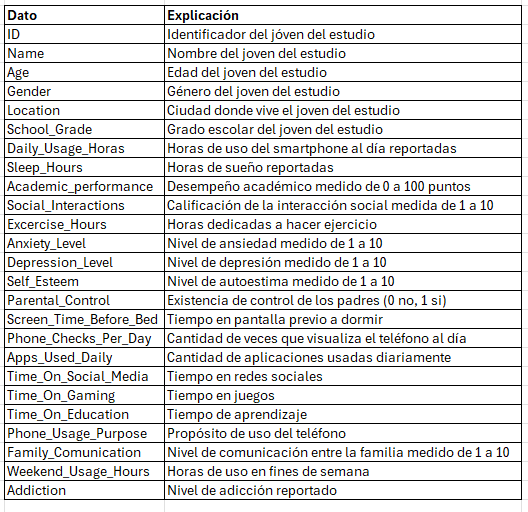

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('data_clf.csv')
data

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78.0,5.0,...,1.4,86,19.0,3.6,1.7,1.2,Browsing,4.0,8.7,High
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70.0,5.0,...,0.9,96,9.0,1.1,4.0,1.8,Browsing,2.0,5.3,High
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93.0,8.0,...,0.5,137,8.0,0.3,1.5,0.4,Education,6.0,5.7,High
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78.0,8.0,...,1.4,128,7.0,3.1,1.6,0.8,Social Media,8.0,3.0,High
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56.0,4.0,...,1.0,96,20.0,2.6,0.9,1.1,Gaming,10.0,3.7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53.0,4.0,...,0.3,80,15.0,2.7,1.8,1.0,NaN,8.0,9.4,High
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93.0,5.0,...,0.9,45,8.0,3.1,0.0,0.3,Gaming,9.0,5.2,Medium
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98.0,1.0,...,0.2,51,13.0,2.4,0.2,2.4,Social Media,9.0,5.9,Medium
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67.0,3.0,...,1.6,125,17.0,1.7,2.6,1.5,Browsing,4.0,6.1,High


# **5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y (Para el modelo de clasificación)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Identificación de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       2900 non-null   float64
 7   Sleep_Hours             2900 non-null   float64
 8   Academic_Performance    2900 non-null   float64
 9   Social_Interactions     2900 non-null   float64
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           2900 non-null   float64
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        2900 non-null   

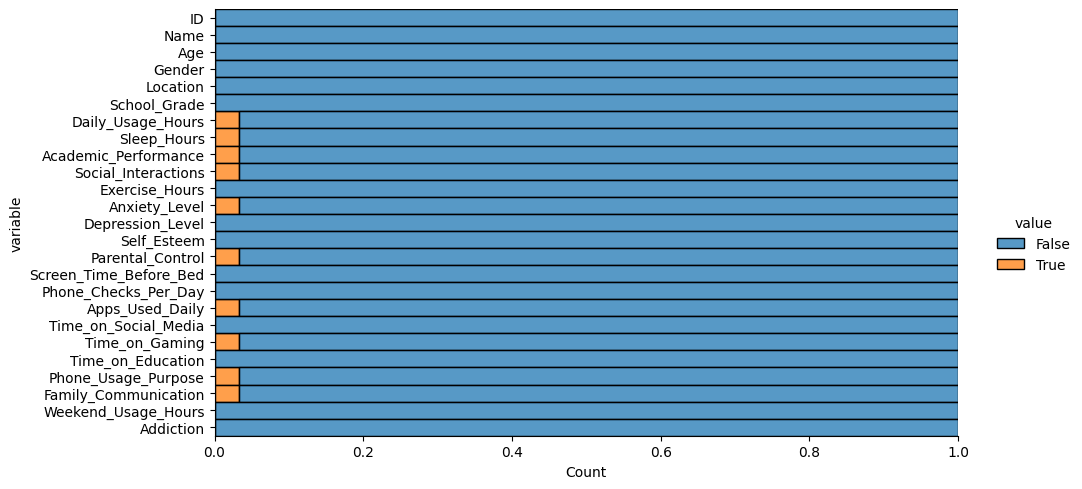

In [4]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

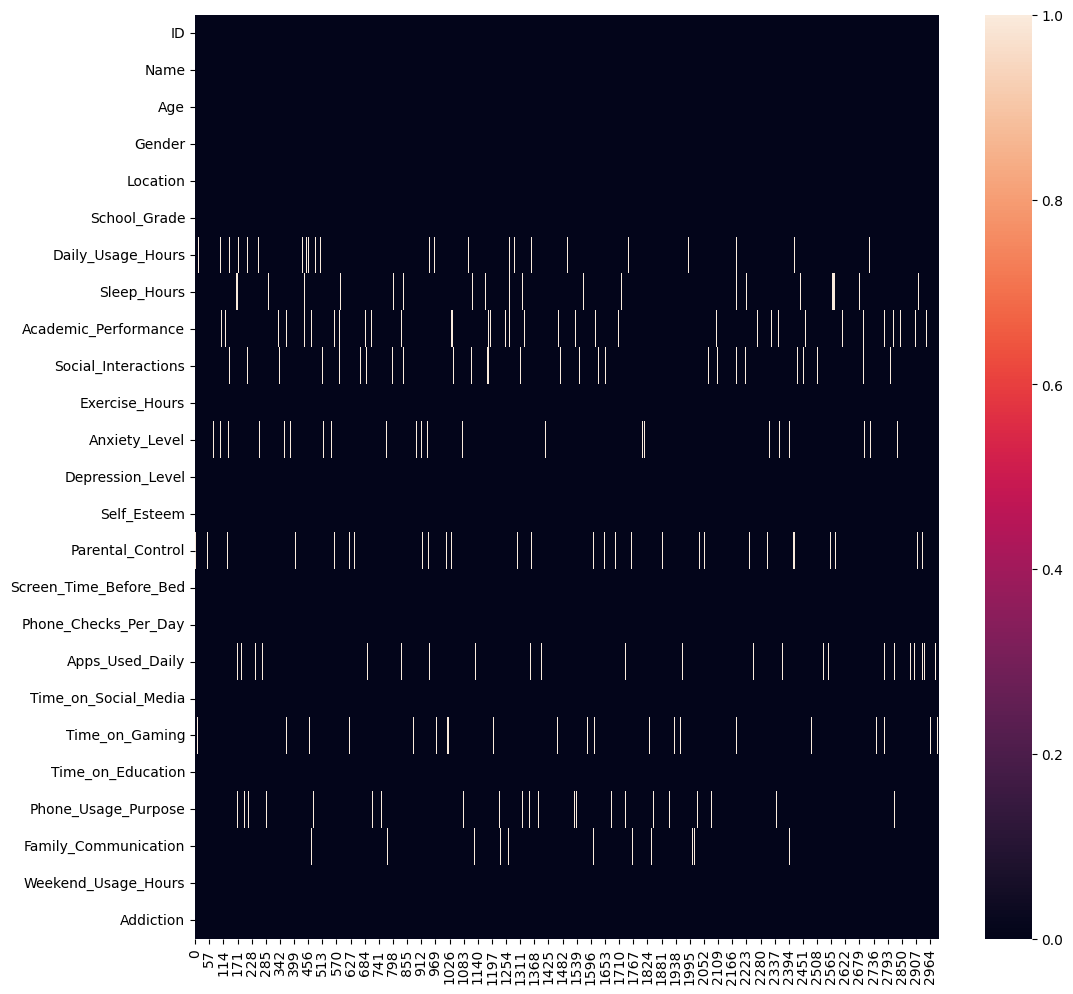

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

Los datos nulos están dispersos en varios registros, por lo que al eliminarlos se eliminarían más del 10% de los datos. La mejor estrategia es imputar los datos nulos. 

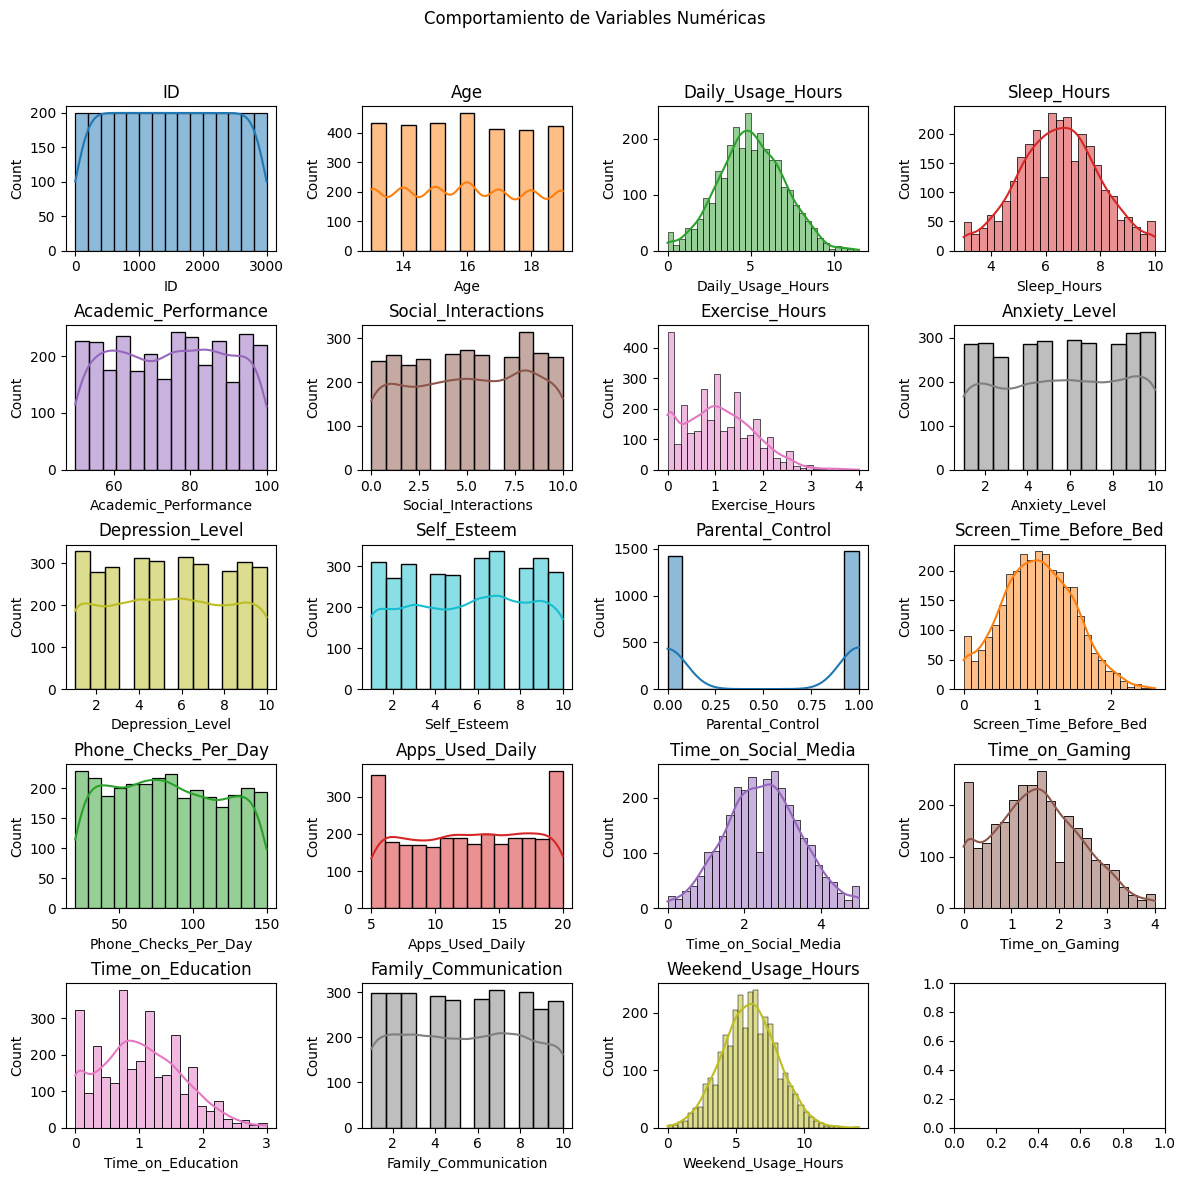

In [6]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

Academic Performance: No paramétrica
Social interactions: 3 grupos definidos que se pueden convertir en variable categórica, como el nivel de ansiedad,...
Control Parental: categórica en 0 o 1, no va a determinar si es adicto o no porque hay 50 50 en sí y no.
Apps used daily: 2 eventos de alta frecuencia.
Del tiempo de uso deriva el comportamiento de las variables como tiempo en redes y en juegos, además del uso en fin de semana
De estas, el ID no aporta. Se puede ignorar la edad porque es uniforme

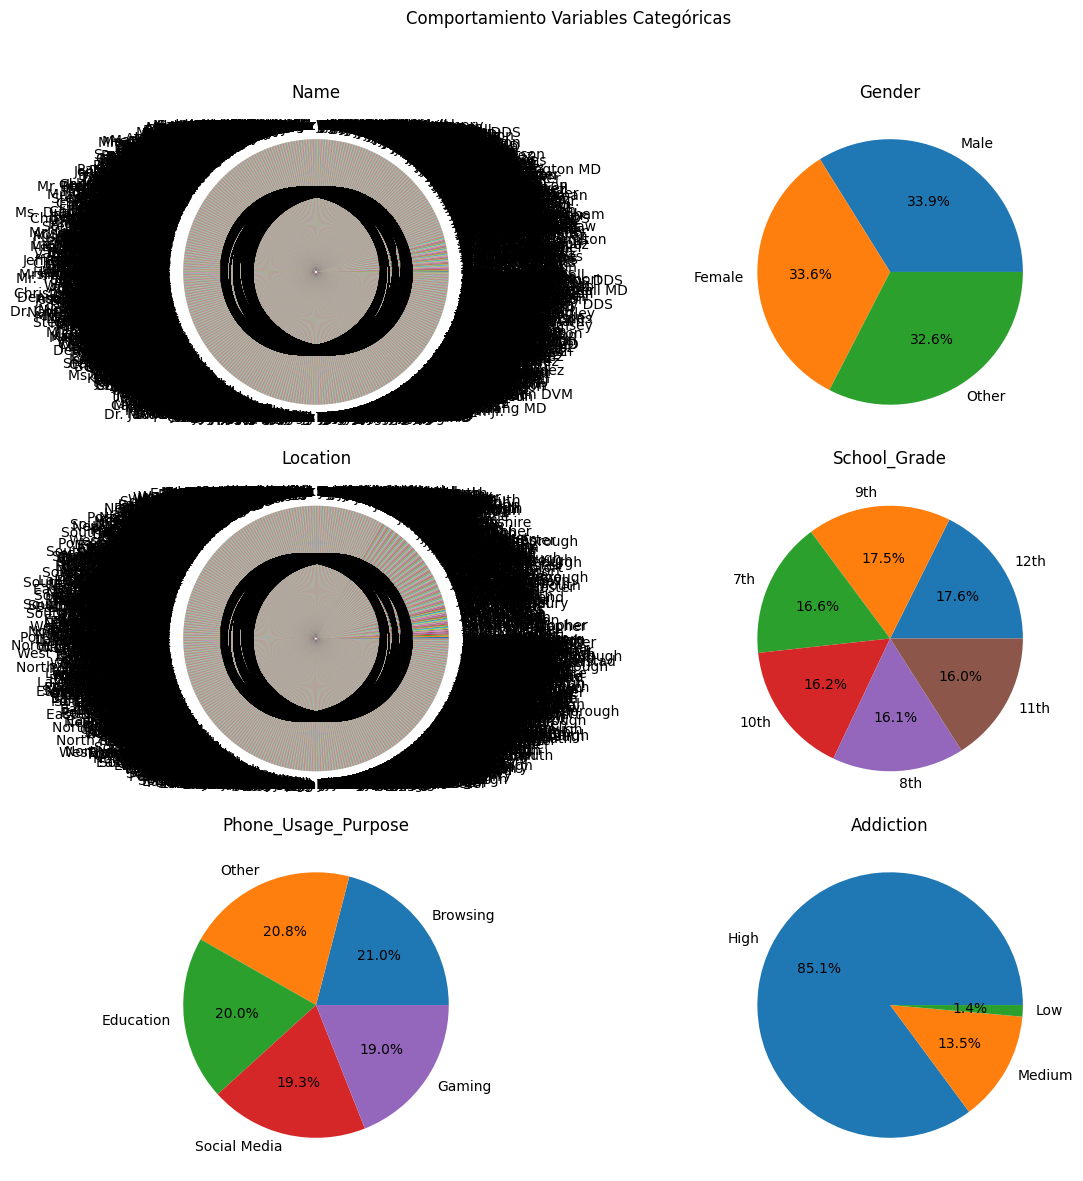

In [7]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(3, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

Name y Location puede complejizar el modelo si no se ignoran.
Muestras equidistribuidas que no sesgan el modelo.
No eliminar la y (Nivel de adicción) balancearla: Reducir la cantidad de individuos para que las clases sean equicompuestas o al contrario -> oversampling: crear individuos nuevos con low o medium para que sean equicompuestos
De entrada, el problema es desbalanceado


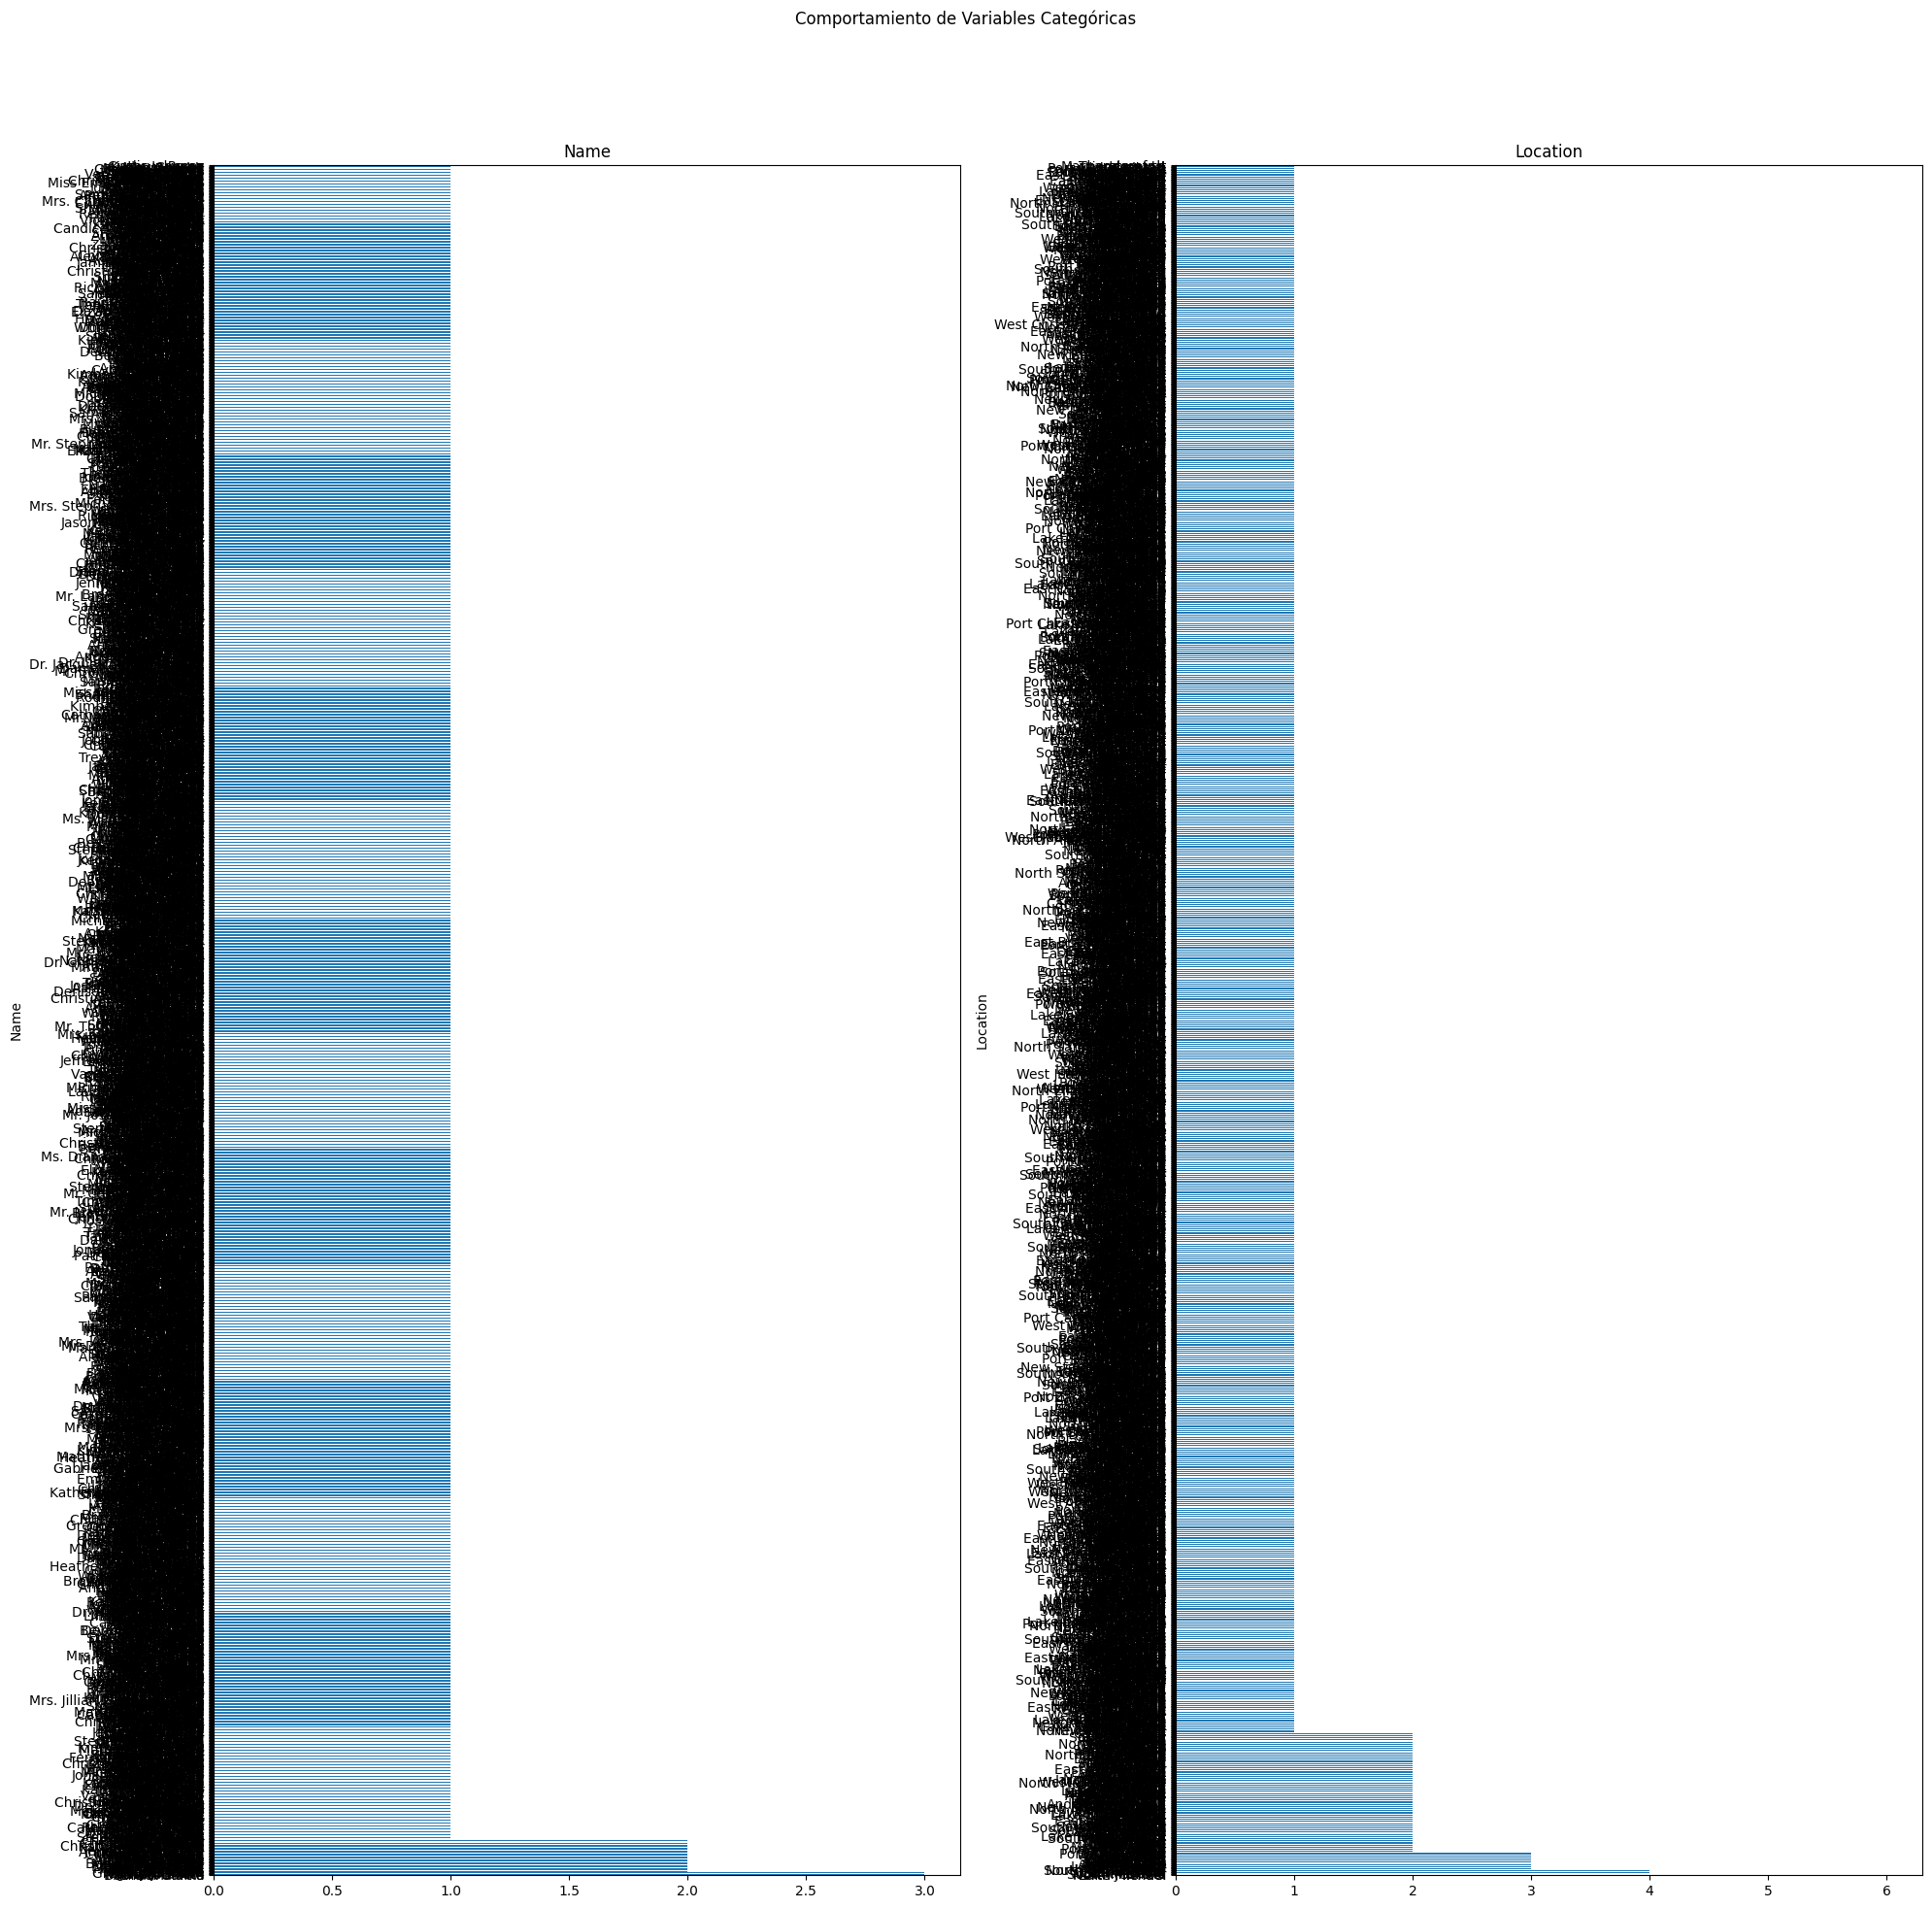

In [8]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Name', 'Location']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Balancear y (es más fácil balancear y después separar)
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba


In [9]:
data_mod = data.drop(['ID', 'Name', 'Location', 'Age'], axis = 1)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Daily_Usage_Hours       2900 non-null   float64
 3   Sleep_Hours             2900 non-null   float64
 4   Academic_Performance    2900 non-null   float64
 5   Social_Interactions     2900 non-null   float64
 6   Exercise_Hours          3000 non-null   float64
 7   Anxiety_Level           2900 non-null   float64
 8   Depression_Level        3000 non-null   int64  
 9   Self_Esteem             3000 non-null   int64  
 10  Parental_Control        2900 non-null   float64
 11  Screen_Time_Before_Bed  3000 non-null   float64
 12  Phone_Checks_Per_Day    3000 non-null   int64  
 13  Apps_Used_Daily         2900 non-null   float64
 14  Time_on_Social_Media    3000 non-null   

In [11]:
data_mod.fillna(20).info() #imputación simple con método constante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Daily_Usage_Hours       3000 non-null   float64
 3   Sleep_Hours             3000 non-null   float64
 4   Academic_Performance    3000 non-null   float64
 5   Social_Interactions     3000 non-null   float64
 6   Exercise_Hours          3000 non-null   float64
 7   Anxiety_Level           3000 non-null   float64
 8   Depression_Level        3000 non-null   int64  
 9   Self_Esteem             3000 non-null   int64  
 10  Parental_Control        3000 non-null   float64
 11  Screen_Time_Before_Bed  3000 non-null   float64
 12  Phone_Checks_Per_Day    3000 non-null   int64  
 13  Apps_Used_Daily         3000 non-null   float64
 14  Time_on_Social_Media    3000 non-null   

Transformar de manera ordinal las variables categóricas con miras a imputar los datos

In [13]:
import sklearn
import sklearn.preprocessing
categorical_cols = data_mod.select_dtypes(include = 'object').columns 
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(), categorical_cols), remainder = 'passthrough')
categorical_transformer

,transformers,"[('ordinalencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [14]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data_mod),
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data_mod.index).rename(columns = lambda x: x.removeprefix('ordinalencoder__')).rename(columns = lambda x: x.removeprefix('remainder__'))
data_transformed

,Gender,School_Grade,Phone_Usage_Purpose,Addiction,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
0,0.0,5.0,0.0,0.0,4.0,6.1,78.0,5.0,0.1,10.0,...,8.0,0.0,1.4,86.0,19.0,3.6,1.7,1.2,4.0,8.7
1,0.0,3.0,0.0,0.0,5.5,6.5,70.0,5.0,0.0,3.0,...,3.0,0.0,0.9,96.0,9.0,1.1,4.0,1.8,2.0,5.3
2,2.0,1.0,1.0,0.0,5.8,5.5,93.0,8.0,0.8,2.0,...,10.0,NaN,0.5,137.0,8.0,0.3,1.5,0.4,6.0,5.7
3,0.0,2.0,4.0,0.0,3.1,3.9,78.0,8.0,1.6,9.0,...,3.0,0.0,1.4,128.0,7.0,3.1,1.6,0.8,8.0,3.0
4,2.0,5.0,2.0,0.0,2.5,6.7,56.0,4.0,1.1,1.0,...,1.0,0.0,1.0,96.0,20.0,2.6,0.9,1.1,10.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,2.0,NaN,0.0,3.9,6.4,53.0,4.0,0.9,7.0,...,2.0,1.0,0.3,80.0,15.0,2.7,1.8,1.0,8.0,9.4
2996,0.0,4.0,2.0,2.0,3.6,7.3,93.0,5.0,0.0,8.0,...,9.0,1.0,0.9,45.0,8.0,3.1,0.0,0.3,9.0,5.2
2997,2.0,3.0,4.0,2.0,3.2,6.5,98.0,1.0,0.0,4.0,...,9.0,NaN,0.2,51.0,13.0,2.4,0.2,2.4,9.0,5.9
2998,0.0,5.0,0.0,0.0,6.7,7.5,67.0,3.0,0.2,3.0,...,9.0,0.0,1.6,125.0,17.0,1.7,2.6,1.5,4.0,6.1


Variables categóricas de forma ordinal para imputar las variables por modelo

In [15]:
#Imputación por vecindad
knn_imputer = sklearn.impute.KNNImputer(n_neighbors = 10) 
data_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transformed).round(),
                           columns = data_transformed.columns,
                           index = data_transformed.index)
data_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [16]:
#Imputación recursiva
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
recursive_imputer = sklearn.impute.IterativeImputer(estimator = RandomForestRegressor(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transformed).round(),
                                 columns = data_transformed.columns,
                                 index = data_transformed.index)
data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [ ]:
#ahora vamos a devolver en términos del data recursive que est´ra completamente en fdatos numéricos, dependiendo de la cantidad de categorias que se tengan se imputarán de diferente manera  
data_recursive_df

In [ ]:
data_imputed=data_recursive_df.copy()
data_imputed[categorical_cols]=(categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X=data_recursive_df[categorical_cols]))
data_imputed

###  Ahora vamos a valanciar a y (está desvalanceada por defecto) y= addiction. 
Se puede hacer el balanceo por:
- Submuestreo (data reduction): Llevar la o las clases de mayor frecuencia al tamaño de la de menor frecuencia Es decir de forma aleat se empieza a eliminar individuos hasta que sean de menor frecuencia.
Mejor en entornos big data (1millon de datos) donde la eliminacion no es preocupante, pero no es lo ideal en todos los modelos
Sería llevar tanto hight como medium al tamaño de low 
- Remuestreo (Data argumentation) : Llevar la o las clases de mayor frecuencia al tamaño de mayor frecuencia. 
Se recrea cierta cantidad de elementos. 
Se puede hacer :
1. de forma aleatoria o replicacion: un mismo individuo se genera muchas veces, se utilizan a ellos mismos para aumentar las secuencias de los datos 
2. Usando funcones de densidad de probabilidad o de masa de probabilidad, a veces las variables no son parametricas entonces es más duro desarrollar. SMOTE/ SMOTE TONEK tratan de estimar y crear individuos nuevos, se puede hacer despues 


In [ ]:
import numpy as np 
y = 2**2
print(y)

: 

In [ ]:
data_high= data_imputed[data_imputed['Addiction']== 'High']
data_medium=data_imputed[data_imputed['Addiction']== 'Medium']
data_low=data_imputed[data_imputed[''Addiction]=='Low']
print(f'El tamaño de la clase high es :{data_high.shape}\n El tamaño d ela clase medium es {data_medium.shape}\nEl tamaño de la clase low es: {data_low.shape}')

In [ ]:
data_medium_re= data_medium.sample(data_high.shape[0], replace=True)
data_low_re=data_low.sample(data_high.shape[0], replace=True)
data_balanced= pd.concat([data_high, data_medium_re, data_low_re])
data_balanced.reset_index(drop= True,implace=True)
data_balanced.info()

In [ ]:
#vamos a confirmar que está balanceada 
plt.pie(x=data_balanced.Addiction.value_count(), labels= data_balanced.Addiction.value_counts().index, autopct='%0.1%')
#vamos a tranformar siempre en claseficacion, donde se sebaran las x de las y. Con el objetivo de aplicarles el min max scaller.

In [ ]:
x= data_balanced.drop('Addiction', axis= 1)
y = data_balanced[['Addiction']]
print(f'El tamaño de x es: {x.shape} El tamaño de y es: {y.shape}')
#genero, grado y telefono no tienen más de 25 características. En caso de haber usado location y name seria un paso adicional que se tendría que tener en cuenta relacionado con clasificación ordinal 

In [ ]:
from sklearn.compose 


In [ ]:
X_pre
#python los que hace es una matriz dispersa, una matriz llena de 0 y 1, es una vista comprimida de los datos 


In [ ]:
#Separacion del conjunto y prueba es el ultimo paso 


# modelos de clasificación 
- Vamos a explorar desde la parte teorica como funcionan los modelos y ver cómo funcionan en la parte práctica 
- Vamos a utilizar en los modelos busqueda de hiperparametros con validación cruzada 
- Se les dará una región de búsqueda a los hiperparamentros, para porder evitar el sobreajuste, a su vez los modelos de datos pueden estar en 3 estados 
1. Ajustado Dent= Dval-->1
2. Subajustado : desempeño en entrenamientos es menor a desempeño en validación pero Dent = Dval < 0.5
3. Sobreajustado : desempeño en entrenamiento es mucho mayor que el desempeño en validación (mas del 20 % relativo ) el modelo está sonreajustado. Dent>>>Dval
#### El desempreño en clasificacion 
- Matriz de confución:  arreglo o matriz cuadarada que va a clasificar cómo se está dando la organización de la variable y. la y tiene 2 posibles valores, puede tener una connotación negativa que se marca con 0, y conotación positiva que se marca con 1. En la parte de las columnas van las predicciones y en las filas van las realidades. 
Se busca que la suma de verdaderos positivos sea igual a la suma de 
A partir de la matriz de confusión salen las demás formas

### Regresión logistica 
### K vecinos más cercanos
### Naive Bayes
### Maquinas de soporte vectorial
### Arboles de desición 
### bosques aleatorios 
### Adaptative boosting 
### gradient boosting
### redes neuronales percepción multicapa

